### Import Libraries and Read Data

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [3]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6

In [4]:
## Read Data for Cases, Deaths and Recoveries
rki_raw = pd.read_csv(download_link)

In [5]:
rki_raw.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,Landkreis ID,Datenstand,Neuer Fall,Neuer Todesfall,Referenzdatum,Neu Genesen,Anzahl Genesen
87322,16,Thüringen,LK Altenburger Land,A60-A79,W,1,0,1754993,3/27/2020 12:00:00 AM,16077,"11.04.2020, 00:00 Uhr",0,-9,3/18/2020 12:00:00 AM,-9,0
87323,16,Thüringen,LK Altenburger Land,A60-A79,W,1,0,1754994,4/2/2020 12:00:00 AM,16077,"11.04.2020, 00:00 Uhr",0,-9,3/31/2020 12:00:00 AM,-9,0
87324,16,Thüringen,LK Altenburger Land,A60-A79,W,1,0,1754995,4/5/2020 12:00:00 AM,16077,"11.04.2020, 00:00 Uhr",0,-9,3/31/2020 12:00:00 AM,-9,0
87325,16,Thüringen,LK Altenburger Land,A80+,M,1,0,1754996,3/24/2020 12:00:00 AM,16077,"11.04.2020, 00:00 Uhr",0,-9,3/16/2020 12:00:00 AM,-9,0
87326,16,Thüringen,LK Altenburger Land,A80+,M,1,0,1754997,3/27/2020 12:00:00 AM,16077,"11.04.2020, 00:00 Uhr",0,-9,3/23/2020 12:00:00 AM,0,1


In [6]:
condition = rki_raw['Neuer Fall'].isin((0, 1))
rki_cases = rki_raw[condition].groupby('Meldedatum').sum()['AnzahlFall'].copy()
rki_cases.index = pd.to_datetime(rki_cases.index)
rki_cases = rki_cases.sort_index()
rki_cases.sum()

117658

In [7]:
condition = rki_raw['Neuer Todesfall'].isin((0, 1))
rki_death = rki_raw[condition].groupby('Meldedatum').sum()['AnzahlTodesfall'].copy()
rki_death.index = pd.to_datetime(rki_death.index)
rki_death = rki_death.sort_index()

In [8]:
condition = rki_raw['Neu Genesen'].isin((0, 1))
rki_recovered = rki_raw[condition].groupby('Meldedatum').sum()['Anzahl Genesen'].copy()
rki_recovered.index = pd.to_datetime(rki_recovered.index)
rki_recovered = rki_recovered.sort_index()

In [9]:
rki = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeath', 'Anzahl Genesen': 'NewRecovered'}
rki.rename(columns_dict, axis=1, inplace=True)
rki.fillna(value=0., inplace=True)
rki.tail()

,NewCases,NewDeath,NewRecovered
Meldedatum,,,
2020-04-06,3598,80.0,490.0
2020-04-07,5003,56.0,539.0
2020-04-08,5044,39.0,354.0
2020-04-09,4124,24.0,210.0
2020-04-10,1192,7.0,25.0


In [10]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail()

,NewCases,NewDeath,NewRecovered,Cases,Death,Recovered,ActiveCases,Growth
Meldedatum,,,,,,,,
2020-04-06,3598,80.0,490.0,102295,2418.0,56315.0,45980.0,0.078251
2020-04-07,5003,56.0,539.0,107298,2474.0,56854.0,50444.0,0.099179
2020-04-08,5044,39.0,354.0,112342,2513.0,57208.0,55134.0,0.091486
2020-04-09,4124,24.0,210.0,116466,2537.0,57418.0,59048.0,0.069841
2020-04-10,1192,7.0,25.0,117658,2544.0,57443.0,60215.0,0.019796


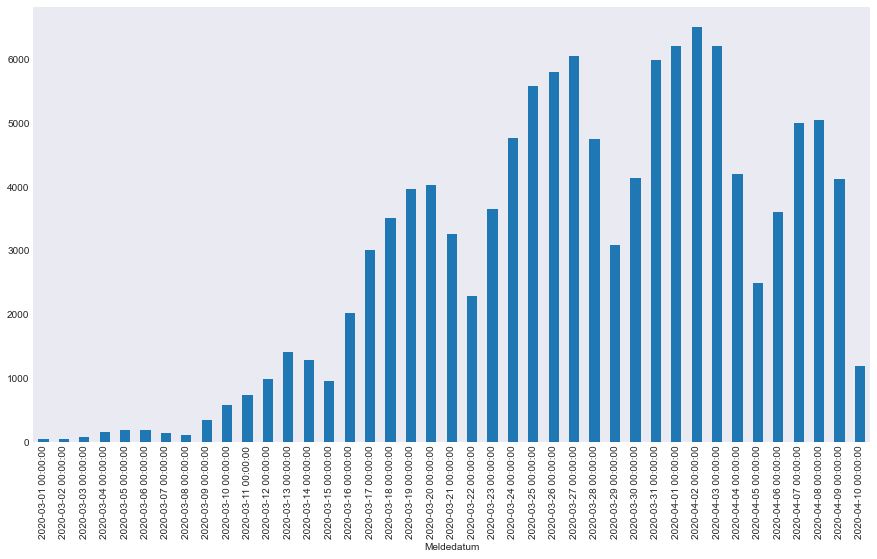

In [11]:
rki.NewCases['03-01-2020':].plot.bar()

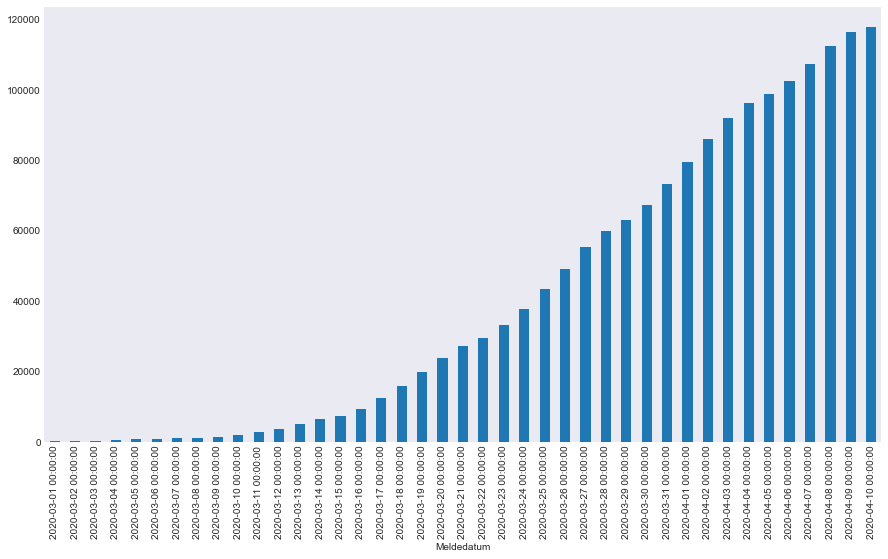

In [12]:
rki.Cases['03-01-2020':].plot.bar()

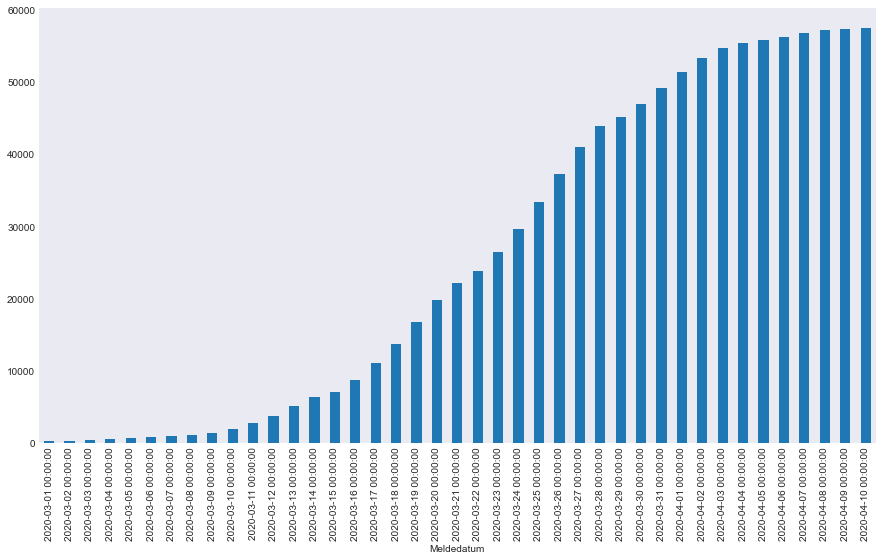

In [13]:
rki.Recovered['03-01-2020':].plot.bar()

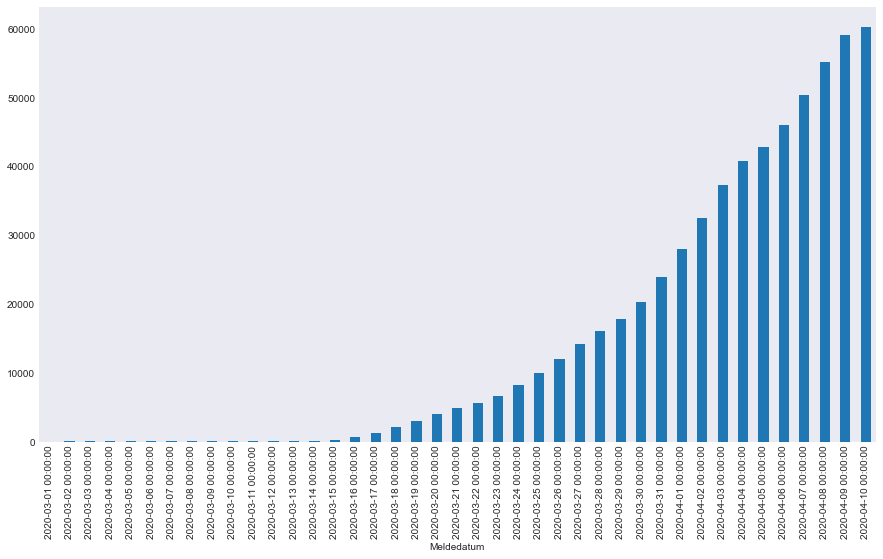

In [14]:
rki.ActiveCases['03-01-2020':].plot.bar()

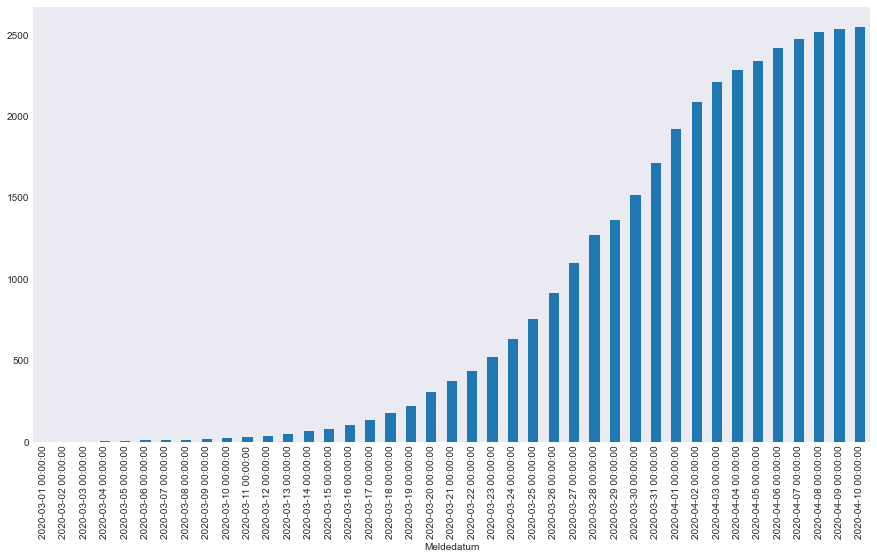

In [15]:
rki.Death['03-01-2020':].plot.bar()

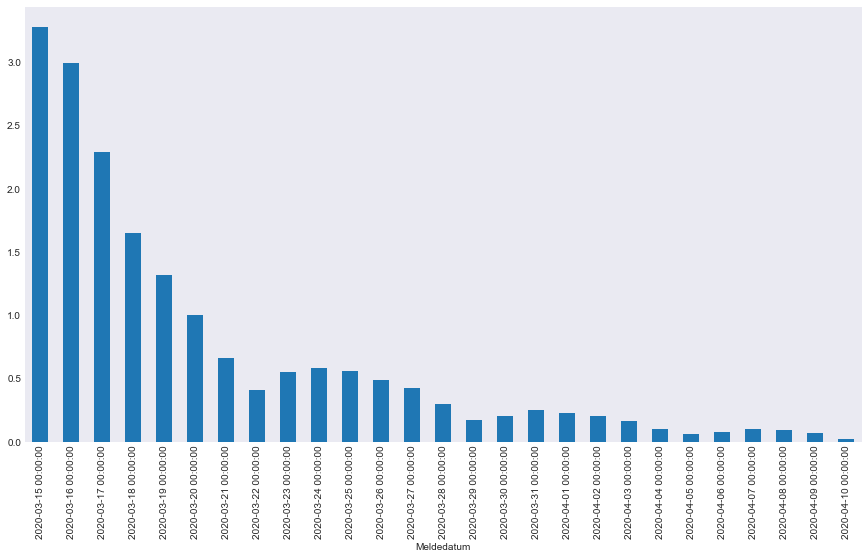

In [16]:
rki.Growth['03-15-2020':].plot.bar()